In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [4]:
start = '2010-01-01'
end = '2019-12-31'

In [5]:
df = yf.download('TSLA', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,27.452000,28.134001,27.333332,27.948000,27.948000,199794000
2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500
2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500
2019-12-27,29.000000,29.020666,28.407333,28.691999,28.691999,149185500
2019-12-30,28.586000,28.600000,27.284000,27.646667,27.646667,188796000


In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [8]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


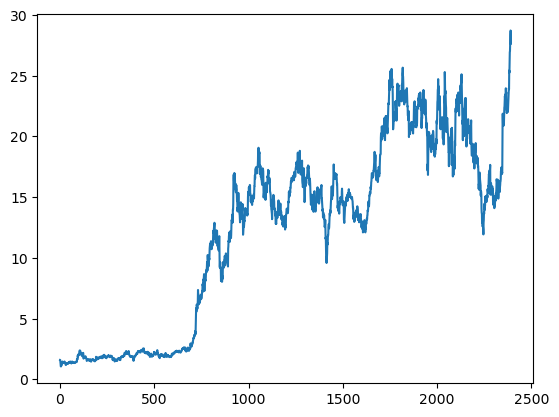

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500
...,...,...,...,...,...
2388,27.452000,28.134001,27.333332,27.948000,199794000
2389,27.890667,28.364668,27.512667,28.350000,120820500
2390,28.527332,28.898666,28.423332,28.729334,159508500
2391,29.000000,29.020666,28.407333,28.691999,149185500


In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2388    18.778527
2389    18.905800
2390    19.040880
2391    19.173967
2392    19.294820
Name: Close, Length: 2393, dtype: float64

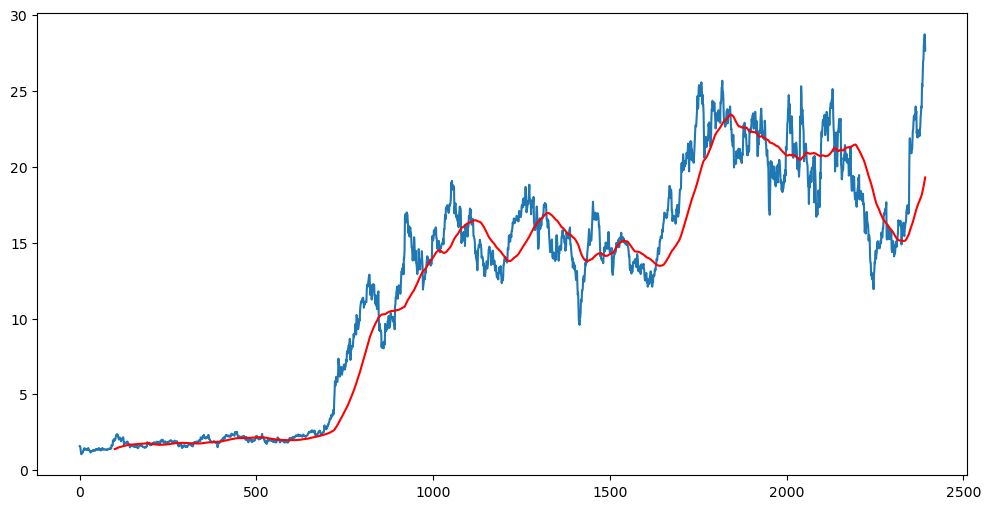

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2388    17.430070
2389    17.477367
2390    17.524693
2391    17.571500
2392    17.617923
Name: Close, Length: 2393, dtype: float64

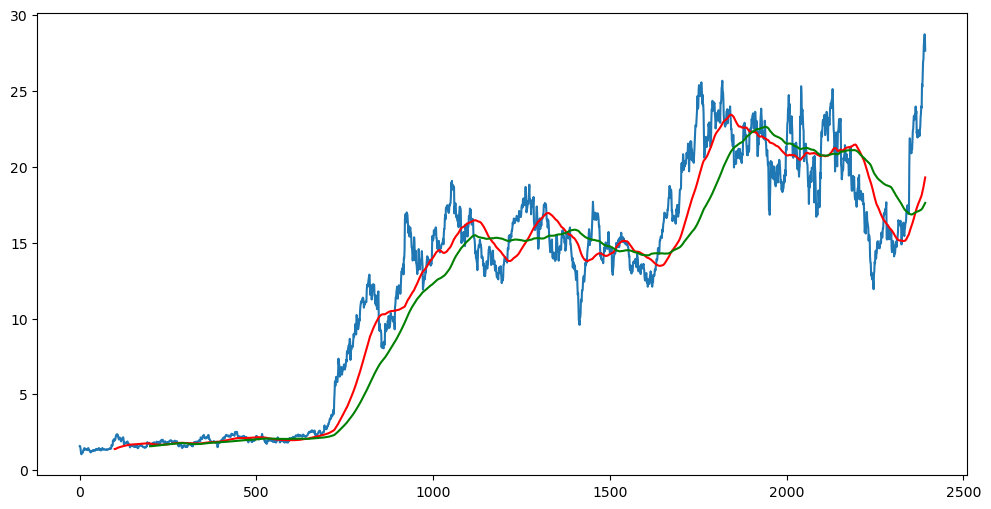

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(2393, 5)

In [16]:
# Splitting the data into training and testing

training_data = pd.DataFrame(df['Close'][0: int(len(df)*0.7)])
testing_data = pd.DataFrame(df['Close'][int(len(df)*0.7): int(len(df))])

print(training_data.shape)
print(testing_data.shape)

(1675, 1)
(718, 1)


In [17]:
training_data.head()

,Close
0,1.592667
1,1.588667
2,1.464000
3,1.280000
4,1.074000


In [18]:
testing_data.head()

,Close
1675,17.066000
1676,17.133333
1677,16.415333
1678,16.666000
1679,16.667999


In [19]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

In [20]:
training_data_array = scalar.fit_transform(training_data)
training_data_array

array([[0.02993639],
       [0.02971437],
       [0.02279457],
       ...,
       [0.94889733],
       [0.96799146],
       [0.95363383]])

In [21]:
x_train = []
y_train = []

for i in range (100, training_data_array.shape[0]):
    x_train.append(training_data_array[i-100: i])
    y_train.append(training_data_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [22]:
x_train.shape

(1575, 100, 1)

In [23]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
               
               
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))             
model.add(Dropout(0.3))
            
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))   
model.add(Dropout(0.4))
               
model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))
               
model.add(Dense(units=1))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
50/50 [==============================] - 5s 89ms/step - loss: 0.0680
Epoch 2/50
50/50 [==============================] - 4s 89ms/step - loss: 0.0136
Epoch 3/50
50/50 [==============================] - 5s 93ms/step - loss: 0.0120
Epoch 4/50
50/50 [==============================] - 5s 93ms/step - loss: 0.0110
Epoch 5/50
50/50 [==============================] - 5s 93ms/step - loss: 0.0102
Epoch 6/50
50/50 [==============================] - 5s 93ms/step - loss: 0.0099
Epoch 7/50
50/50 [==============================] - 5s 93ms/step - loss: 0.0093
Epoch 8/50
50/50 [==============================] - 5s 93ms/step - loss: 0.0093
Epoch 9/50
50/50 [==============================] - 5s 93ms/step - loss: 0.0097
Epoch 10/50
50/50 [==============================] - 5s 94ms/step - loss: 0.0095
Epoch 11/50
50/50 [==============================] - 5s 94ms/step - loss: 0.0079
Epoch 12/50
50/50 [==============================] - 5s 94ms/step - loss: 0.0078
Epoch 13/50
50/50 [==================

In [27]:
model.save('keras.model')

INFO:tensorflow:Assets written to: keras.model/assets


INFO:tensorflow:Assets written to: keras.model/assets


In [28]:
testing_data.head()

,Close
1675,17.066000
1676,17.133333
1677,16.415333
1678,16.666000
1679,16.667999


In [29]:
training_data.tail(100)

,Close
1575,13.380000
1576,13.602000
1577,14.246667
1578,14.094000
1579,13.897333
...,...
1670,18.650667
1671,17.930000
1672,18.148666
1673,18.492666


In [30]:
past_100_days = training_data.tail(100)

In [35]:
final_df = pd.concat([past_100_days, testing_data], ignore_index=True)

In [36]:
final_df.head()

,Close
0,13.380000
1,13.602000
2,14.246667
3,14.094000
4,13.897333


In [37]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.08624047],
       [0.09945634],
       [0.13783392],
       [0.12874551],
       [0.11703777],
       [0.08743106],
       [0.07000836],
       [0.08723264],
       [0.08385924],
       [0.08945513],
       [0.08441482],
       [0.06961152],
       [0.05949126],
       [0.07989046],
       [0.09759106],
       [0.07989046],
       [0.0838195 ],
       [0.09441602],
       [0.09274916],
       [0.09235232],
       [0.09937697],
       [0.08334328],
       [0.07445336],
       [0.04691035],
       [0.03591704],
       [0.0335358 ],
       [0.04599761],
       [0.05651471],
       [0.06338062],
       [0.04401322],
       [0.02532051],
       [0.03806016],
       [0.00984252],
       [0.01904992],
       [0.01968493],
       [0.03845701],
       [0.02401087],
       [0.02202648],
       [0.04841853],
       [0.05623692],
       [0.0701671 ],
       [0.06806372],
       [0.04206851],
       [0.04139388],
       [0.01154901],
       [0.00992183],
       [0.03107514],
       [0.027

In [38]:
input_data.shape

(818, 1)

In [40]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(718, 100, 1)
(718,)


In [43]:
y_predicted = model.predict(x_test)

23/23 [==============================] - 1s 24ms/step


In [44]:
y_predicted.shape

(718, 1)

In [45]:
y_test

array([0.30567133, 0.30967974, 0.26693653, 0.281859  , 0.28197799,
       0.2838037 , 0.28812958, 0.28670083, 0.27630273, 0.26947656,
       0.26165822, 0.25685602, 0.26669843, 0.31364852, 0.30463954,
       0.32972177, 0.32753896, 0.32920582, 0.28459739, 0.30178203,
       0.30086912, 0.33412713, 0.36214635, 0.39084026, 0.39056242,
       0.39270549, 0.39421361, 0.47446122, 0.49501933, 0.46049141,
       0.47517566, 0.49041548, 0.5295075 , 0.51490262, 0.46779379,
       0.49620986, 0.48604997, 0.48132713, 0.50224234, 0.49029649,
       0.50255981, 0.51220386, 0.53506365, 0.52069688, 0.51458503,
       0.53617493, 0.57094095, 0.55530416, 0.52407034, 0.46231689,
       0.51347387, 0.50887014, 0.5647101 , 0.58042625, 0.5720126 ,
       0.57879902, 0.54335831, 0.54784305, 0.50458389, 0.53216652,
       0.52331628, 0.52141132, 0.49565428, 0.52089536, 0.54712861,
       0.58010878, 0.61963726, 0.64309238, 0.64055247, 0.63848877,
       0.6681351 , 0.6900821 , 0.71706953, 0.75814587, 0.70782

In [46]:
y_predicted

array([[0.35405365],
       [0.35794115],
       [0.36126336],
       [0.3638773 ],
       [0.3657455 ],
       [0.36690003],
       [0.36741844],
       [0.36740294],
       [0.36696428],
       [0.3662065 ],
       [0.36521372],
       [0.3640507 ],
       [0.36276713],
       [0.36141068],
       [0.36005664],
       [0.35876969],
       [0.3576158 ],
       [0.35664457],
       [0.35588676],
       [0.35531616],
       [0.35490137],
       [0.3546095 ],
       [0.35443777],
       [0.3544193 ],
       [0.35466054],
       [0.35526443],
       [0.35631496],
       [0.35787785],
       [0.36029327],
       [0.36419338],
       [0.36985254],
       [0.37731856],
       [0.38669696],
       [0.39851233],
       [0.41259626],
       [0.427029  ],
       [0.44064945],
       [0.45257533],
       [0.46227098],
       [0.46989417],
       [0.47560698],
       [0.47982404],
       [0.48310068],
       [0.48628777],
       [0.48969817],
       [0.49320954],
       [0.49699584],
       [0.501

In [47]:
scalar.scale_

array([0.05953089])

In [49]:
scale_factor = 1/0.05953089
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

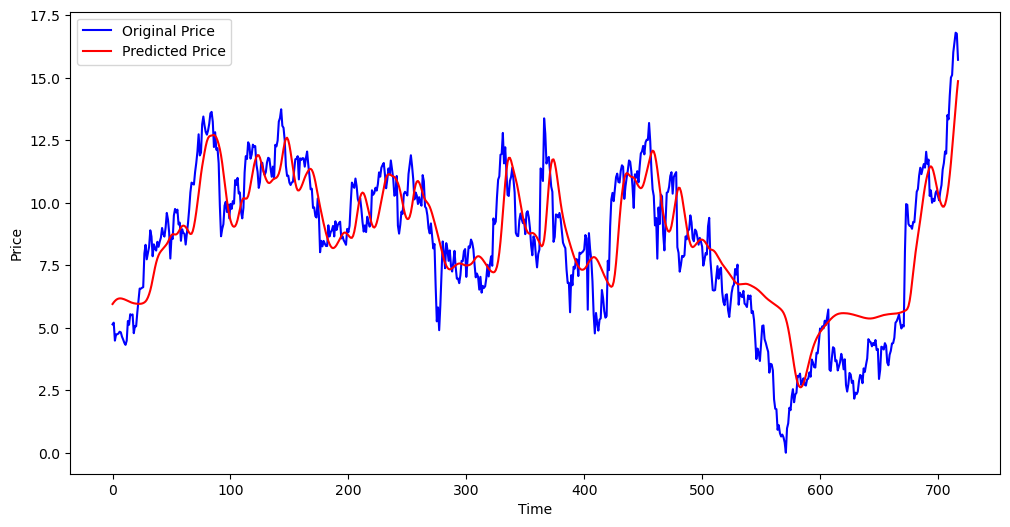

In [50]:
plt. figure(figsize=(12,6))
plt. plot(y_test, 'b', label = 'Original Price')
plt. plot(y_predicted, 'r', label = 'Predicted Price')
plt. xlabel( 'Time')
plt. ylabel( 'Price')
plt. legend()
plt.show()